# 3. 유동/상주/직장인구와 매출 데이터

* 지역별 유동인구의 특성 파악하기 (유동/상주/직장인구 집중 상위 지역 파악)
* 매출 데이터와 상관 관계 파악
* 인구 특성과 매출 시간/요일 집중도 비교


테이블 정리:

* Floating_Population: 유동인구 (해당 지역을 돌아다니는 사람)
* Population_GA: 상주/직장인구 (해당 지역에 있는 사람)

주제별 사용되는 테이블
* 지역별 유동인구의 특성 파악: Floating_Population, Area_Type
* 매출데이터와 유동인구의 상관관계 파악: Sales_*, Shop 
* 인구 특성과 매출 시간/요일의 집중도 비교: Floating_Population (pop_type), Sales_Daytype, Sales_Day, Sales_Time
=> 유동/상주/직장인구 탑 지역은 따로 저장 (resident_area, working_area)

## 3.1. 지역별 유동인구(상주/직장) 파악

### DB에서 데이터 가져오기

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()

remote = mysql.connector.connect(
    host = os.getenv("DB_HOST"),
    user = os.getenv("DB_USER"),
    password = os.getenv("DB_PASSWORD"),
    database = "triodb"
)

In [46]:
query = """
SELECT
    c.name,
    p.commercial_area_code,
    p.pop_type,
    SUM(p.population) AS total_pop
FROM 
    Population_GA as p,
    Commercial_Area as c
WHERE
    c.code = p.commercial_area_code
GROUP BY
    p.commercial_area_code,
    p.pop_type
ORDER BY
    total_pop desc,
    p.pop_type;
"""

df = pd.read_sql(query, remote)

remote.close()

df.head()

/tmp/ipykernel_7731/2567771600.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, remote)


,name,commercial_area_code,pop_type,total_pop
0,명동 남대문 북창동 다동 무교동 관광특구,3001492,WORKING,843479.0
1,여의도역(여의도),3120149,WORKING,539674.0
2,잠실 관광특구,3001495,WORKING,472273.0
3,삼성역,3120222,WORKING,443645.0
4,강남 마이스 관광특구,3001496,WORKING,442640.0


In [47]:
population_df = df

population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  3277 non-null   object 
 1   commercial_area_code  3277 non-null   int64  
 2   pop_type              3277 non-null   object 
 3   total_pop             3277 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 102.5+ KB


In [48]:
population_df.head()

,name,commercial_area_code,pop_type,total_pop
0,명동 남대문 북창동 다동 무교동 관광특구,3001492,WORKING,843479.0
1,여의도역(여의도),3120149,WORKING,539674.0
2,잠실 관광특구,3001495,WORKING,472273.0
3,삼성역,3120222,WORKING,443645.0
4,강남 마이스 관광특구,3001496,WORKING,442640.0


In [49]:
population_df.to_csv("../data/3_1_지역별_유동인구_파악.csv")

In [22]:
import mysql.connector
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()

remote = mysql.connector.connect(
    host = os.getenv("DB_HOST"),
    user = os.getenv("DB_USER"),
    password = os.getenv("DB_PASSWORD"),
    database = "triodb"
)

query = """
SELECT
    c.name,
    p.commercial_area_code,
    p.pop_type,
    SUM(p.population) AS total_pop
FROM 
    Population_GA as p,
    Commercial_Area as c
WHERE
    c.code = p.commercial_area_code
GROUP BY
    p.commercial_area_code,
    p.pop_type
ORDER BY
    total_pop desc,
    p.pop_type;
"""

df = pd.read_sql(query, remote)

remote.close()

df.head()

/tmp/ipykernel_23190/790476392.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, remote)


,name,commercial_area_code,pop_type,total_pop
0,명동 남대문 북창동 다동 무교동 관광특구,3001492,WORKING,843479.0
1,여의도역(여의도),3120149,WORKING,539674.0
2,잠실 관광특구,3001495,WORKING,472273.0
3,삼성역,3120222,WORKING,443645.0
4,강남 마이스 관광특구,3001496,WORKING,442640.0


In [24]:
import mysql.connector
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()

remote = mysql.connector.connect(
    host = os.getenv("DB_HOST"),
    user = os.getenv("DB_USER"),
    password = os.getenv("DB_PASSWORD"),
    database = "triodb"
)

query = """
SELECT
    c.name,
    fp.commercial_area_code,
    SUM(fp.total_pop) AS total_pop
FROM 
    Floating_Population as fp,
    Commercial_Area as c
WHERE
    c.code = fp.commercial_area_code
GROUP BY
    fp.commercial_area_code
ORDER BY
    total_pop desc;
"""

df_float_pop = pd.read_sql(query, remote)

remote.close()

df_float_pop.head()

/tmp/ipykernel_23190/1986255933.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_float_pop = pd.read_sql(query, remote)


,name,commercial_area_code,total_pop
0,종로·청계 관광특구,3001494,33490828.0
1,강남역,3120189,31196583.0
2,명동 남대문 북창동 다동 무교동 관광특구,3001492,28555325.0
3,"신촌역(신촌역, 신촌로터리)",3120094,26198955.0
4,종로3가역,3120009,24131042.0


### 시각화

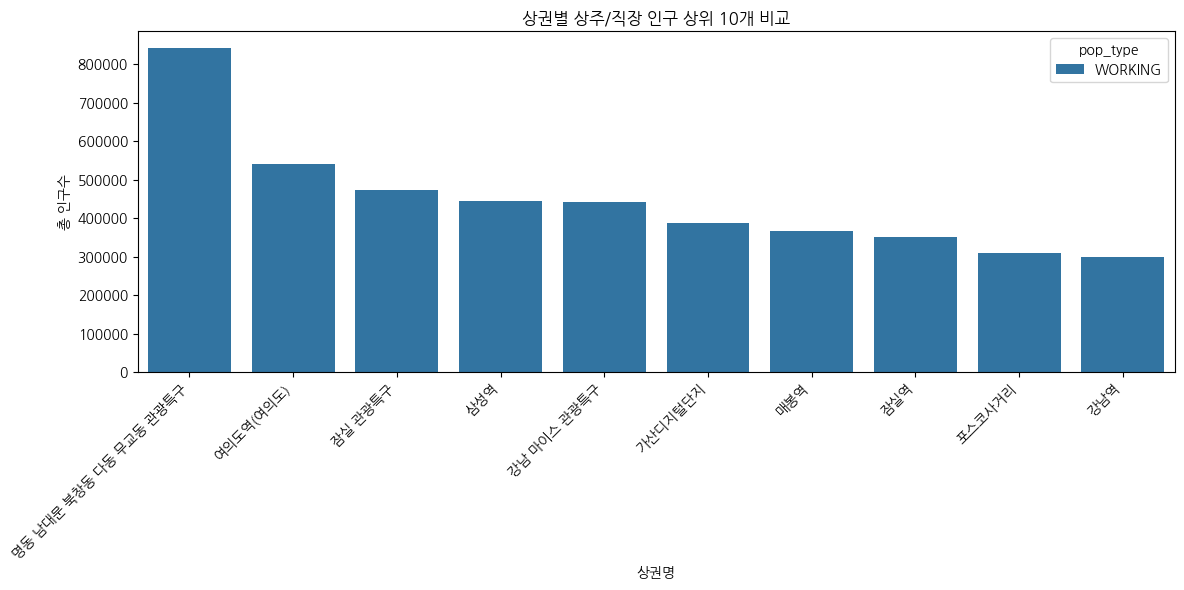

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# total_pop 기준 상위 10개만 추출
top10 = df.nlargest(10, 'total_pop')

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x='name',
    y='total_pop',
    hue='pop_type'
)

plt.title('상권별 상주/직장 인구 상위 10개 비교')
plt.xlabel('상권명')
plt.ylabel('총 인구수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



/tmp/ipykernel_23190/3408676943.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'total_pop'))


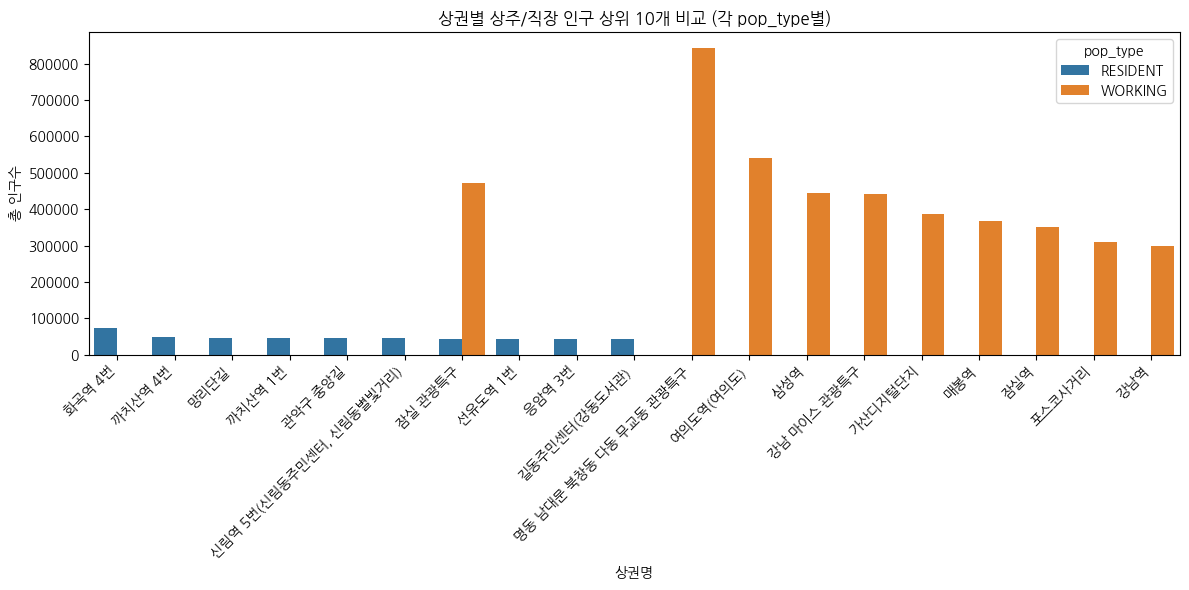

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# pop_type별 상위 10개씩 추출
top10_each = (
    df.groupby('pop_type', group_keys=False)
      .apply(lambda x: x.nlargest(10, 'total_pop'))
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10_each,
    x='name',
    y='total_pop',
    hue='pop_type'
)

plt.title('상권별 상주/직장 인구 상위 10개 비교 (각 pop_type별)')
plt.xlabel('상권명')
plt.ylabel('총 인구수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


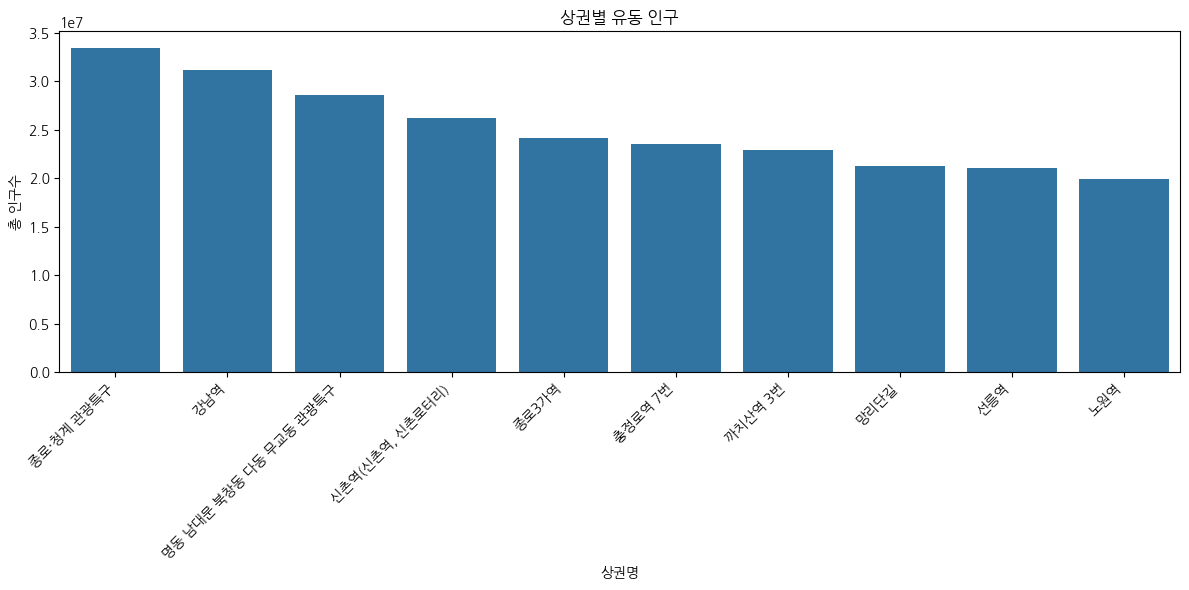

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# pop_type별 상위 10개씩 추출
top10_each = (
    df_float_pop.nlargest(10, "total_pop")
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10_each,
    x='name',
    y='total_pop'
)

plt.title('상권별 유동 인구')
plt.xlabel('상권명')
plt.ylabel('총 인구수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 3.2. 매출데이터와 유동인구의 상관관계 파악

### DB에서 데이터 가져오기

In [5]:

remote.close()


In [ ]:
import mysql.connector
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()


remote = mysql.connector.connect(
    host = "triodb.crgkkewom2kz.ap-northeast-2.rds.amazonaws.com",
    user = "yang",
    password = "trio1234",
    database = "triodb"
)


# 1. 임시 테이블 생성
create_temp_query = """
    CREATE TEMPORARY TABLE sales_summary AS
    SELECT s.commercial_area_code, SUM(sd.sales) AS total_sales
    FROM Sales_Day sd
    JOIN Shop_Count s ON sd.store_id = s.id
    GROUP BY s.commercial_area_code;
"""
with remote.cursor() as cur:
    cur.execute(create_temp_query)
    remote.commit()  # 임시 테이블 생성 완료

# 2. 실제 데이터 조회
select_query = """
    SELECT
        c.name AS commercial_area_name,
        pg.pop_type,
        SUM(pg.population) AS total_population,
        ss.total_sales
    FROM sales_summary ss
    JOIN Commercial_Area c ON ss.commercial_area_code = c.code
    JOIN Population_GA pg ON pg.commercial_area_code = c.code
    GROUP BY c.name, pg.pop_type, ss.total_sales
    ORDER BY ss.total_sales DESC;
"""

sales_df = pd.read_sql(select_query, remote)

remote.close()


/tmp/ipykernel_13204/629433563.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_df = pd.read_sql(select_query, remote)


In [7]:
sales_df.head()

,commercial_area_name,pop_type,total_population,total_sales
0,노량진역(노량진),RESIDENT,12828.0,4.377254e+12
1,노량진역(노량진),WORKING,18927.0,4.377254e+12
2,가산디지털단지,RESIDENT,22132.0,3.004122e+12
3,가산디지털단지,WORKING,387730.0,3.004122e+12
4,용산전자상가(용산역),RESIDENT,6020.0,2.481580e+12


In [ ]:
sales_df['total_sales'] = sales_df['total_sales'].apply(lambda x: int(x))


In [9]:
sales_df.head()

,commercial_area_name,pop_type,total_population,total_sales
0,노량진역(노량진),RESIDENT,12828.0,4377254155412
1,노량진역(노량진),WORKING,18927.0,4377254155412
2,가산디지털단지,RESIDENT,22132.0,3004121701306
3,가산디지털단지,WORKING,387730.0,3004121701306
4,용산전자상가(용산역),RESIDENT,6020.0,2481580235065


In [29]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3143 non-null   int64  
 1   commercial_area_name  3143 non-null   object 
 2   pop_type              3143 non-null   object 
 3   total_population      3143 non-null   float64
 4   total_sales           3143 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 122.9+ KB


In [33]:
sales_df.head(), df_float_pop.head()

(   Unnamed: 0 commercial_area_name  pop_type  total_population    total_sales
 0           0            노량진역(노량진)  RESIDENT           12828.0  4377254155412
 1           1            노량진역(노량진)   WORKING           18927.0  4377254155412
 2           2              가산디지털단지  RESIDENT           22132.0  3004121701306
 3           3              가산디지털단지   WORKING          387730.0  3004121701306
 4           4          용산전자상가(용산역)  RESIDENT            6020.0  2481580235065,
                      name  commercial_area_code   total_pop
 0              종로·청계 관광특구               3001494  33490828.0
 1                     강남역               3120189  31196583.0
 2  명동 남대문 북창동 다동 무교동 관광특구               3001492  28555325.0
 3         신촌역(신촌역, 신촌로터리)               3120094  26198955.0
 4                   종로3가역               3120009  24131042.0)

In [34]:
df_new = pd.DataFrame({
    'commercial_area_name': df_float_pop['name'],
    'pop_type': 'FLOATING',
    'total_population': df_float_pop['total_pop'],
    'total_sales': np.nan  # 새로 추가할 행이므로 매출은 결측값 처리
})

# sales_df에 FLOATING 행 추가
sales_df = pd.concat([sales_df, df_new], ignore_index=True)

# total_sales 컬럼 제거
sales_df.drop(columns=['total_sales'], inplace=True)

# 인덱스 정리
sales_df.reset_index(drop=True, inplace=True)

In [35]:
sales_df.head()

,Unnamed: 0,commercial_area_name,pop_type,total_population
0,0.0,노량진역(노량진),RESIDENT,12828.0
1,1.0,노량진역(노량진),WORKING,18927.0
2,2.0,가산디지털단지,RESIDENT,22132.0
3,3.0,가산디지털단지,WORKING,387730.0
4,4.0,용산전자상가(용산역),RESIDENT,6020.0


In [36]:
sales_df.to_csv("../data/3_2_유동인구_상주_직장인구_수.csv")

### 시각화

In [9]:
import pandas as pd

all_pop_df = pd.read_csv("../data/3_2_유동인구_상주_직장인구_수.csv")

In [10]:
all_pop_df.head()

,Unnamed: 0.1,Unnamed: 0,commercial_area_name,pop_type,total_population
0,0,0.0,노량진역(노량진),RESIDENT,12828.0
1,1,1.0,노량진역(노량진),WORKING,18927.0
2,2,2.0,가산디지털단지,RESIDENT,22132.0
3,3,3.0,가산디지털단지,WORKING,387730.0
4,4,4.0,용산전자상가(용산역),RESIDENT,6020.0


In [11]:
sales_df = pd.read_csv("../data/3_2_매출데이터와_유동인구.csv")

sales_df.head()

,Unnamed: 0,commercial_area_name,pop_type,total_population,total_sales
0,0,노량진역(노량진),RESIDENT,12828.0,4377254155412
1,1,노량진역(노량진),WORKING,18927.0,4377254155412
2,2,가산디지털단지,RESIDENT,22132.0,3004121701306
3,3,가산디지털단지,WORKING,387730.0,3004121701306
4,4,용산전자상가(용산역),RESIDENT,6020.0,2481580235065


In [12]:

# 1. 인구 데이터 준비 (지금 주신 df 사용)
pop_df = all_pop_df.copy()  # df: commercial_area_name, pop_type, total_population 포함

# 2. 상권별 인구 pivot (각 상권별로 pop_type을 열로 변환)
pivot_pop = pop_df.pivot_table(
    index='commercial_area_name',
    columns='pop_type',
    values='total_population',
    aggfunc='sum'
).fillna(0)

# 3. 전체 인구 및 비율 계산
pivot_pop['TOTAL'] = pivot_pop.sum(axis=1)
pivot_pop['RESIDENT_RATIO'] = pivot_pop.get('RESIDENT', 0) / pivot_pop['TOTAL']
pivot_pop['WORKING_RATIO'] = pivot_pop.get('WORKING', 0) / pivot_pop['TOTAL']
pivot_pop['FLOATING_RATIO'] = pivot_pop.get('FLOATING', 0) / pivot_pop['TOTAL']

# 4. 매출 데이터 로드 (sales_* 테이블)
#    예시: sales_time, sales_shop, sales_sales 등에서 total_sales, commercial_area_name 포함된 테이블
#    여기서는 sales_sales 라고 가정
sales_sum = sales_df.groupby('commercial_area_name')['total_sales'].sum().reset_index()

# 5. 매출과 인구 비율 데이터 병합
merged = pd.merge(pivot_pop, sales_sum, on='commercial_area_name', how='inner')

# 6. 상관관계 계산
corr_matrix = merged[['RESIDENT_RATIO', 'WORKING_RATIO', 'FLOATING_RATIO', 'total_sales']].corr()

print(corr_matrix)

                RESIDENT_RATIO  WORKING_RATIO  FLOATING_RATIO  total_sales
RESIDENT_RATIO        1.000000       0.452445       -0.711779    -0.037457
WORKING_RATIO         0.452445       1.000000       -0.948439     0.108454
FLOATING_RATIO       -0.711779      -0.948439        1.000000    -0.072109
total_sales          -0.037457       0.108454       -0.072109     1.000000


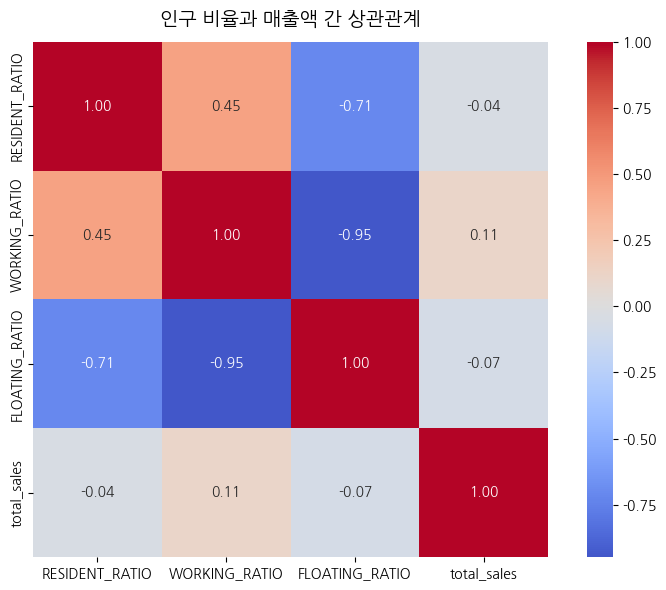

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 깨짐 방지

# 상관계수 행렬(corr_matrix) 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,         # 상관계수 표시
    fmt=".2f",          # 소수점 2자리
    cmap='coolwarm',    # 컬러맵
    center=0,           # 0을 기준으로 색상 구분
    square=True
)

plt.title('인구 비율과 매출액 간 상관관계', fontsize=14, pad=12)
plt.tight_layout()
plt.show()

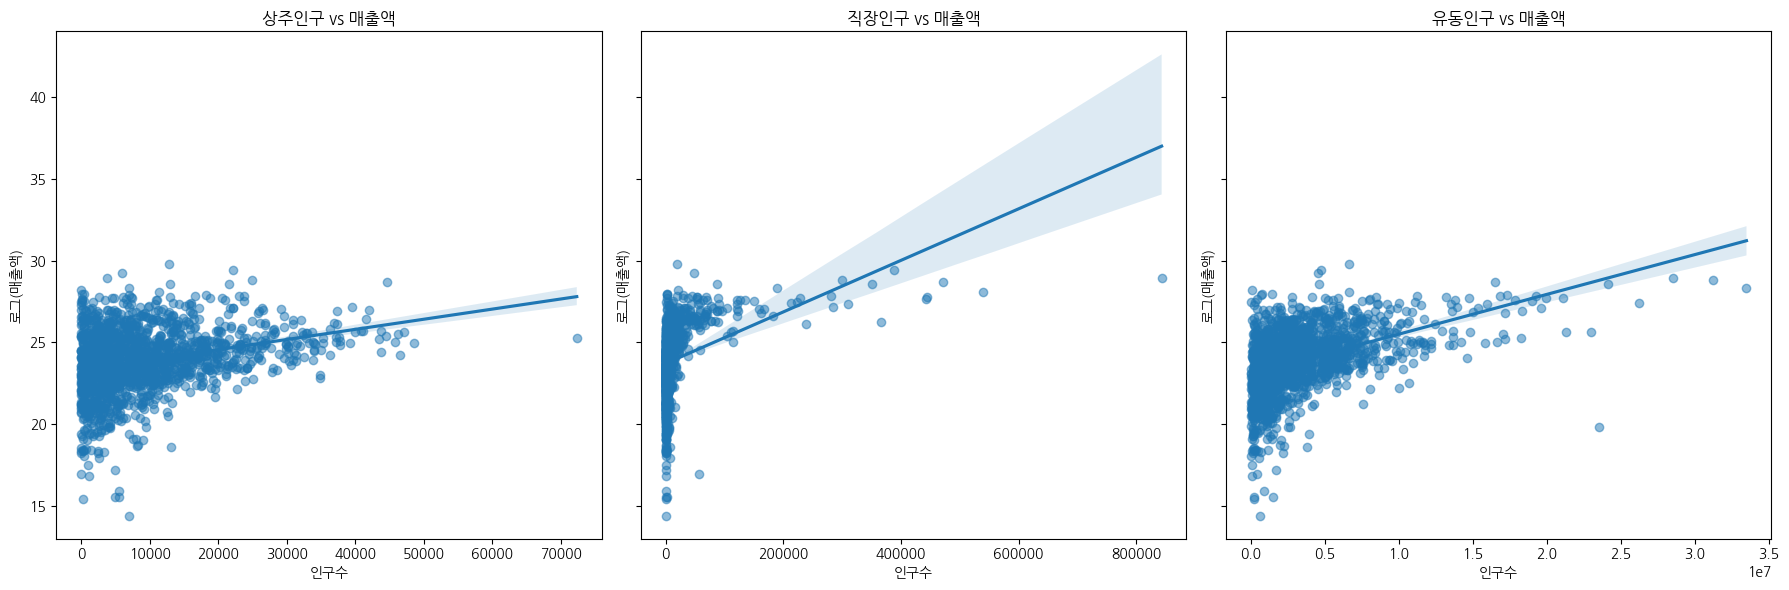

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.regplot(data=merged, x='RESIDENT', y='log_sales', ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=merged, x='WORKING', y='log_sales', ax=axes[1], scatter_kws={'alpha':0.5})
sns.regplot(data=merged, x='FLOATING', y='log_sales', ax=axes[2], scatter_kws={'alpha':0.5})

axes[0].set_title('상주인구 vs 매출액')
axes[1].set_title('직장인구 vs 매출액')
axes[2].set_title('유동인구 vs 매출액')

for ax in axes:
    ax.set_xlabel('인구수')
    ax.set_ylabel('로그(매출액)')

plt.tight_layout()
plt.show()

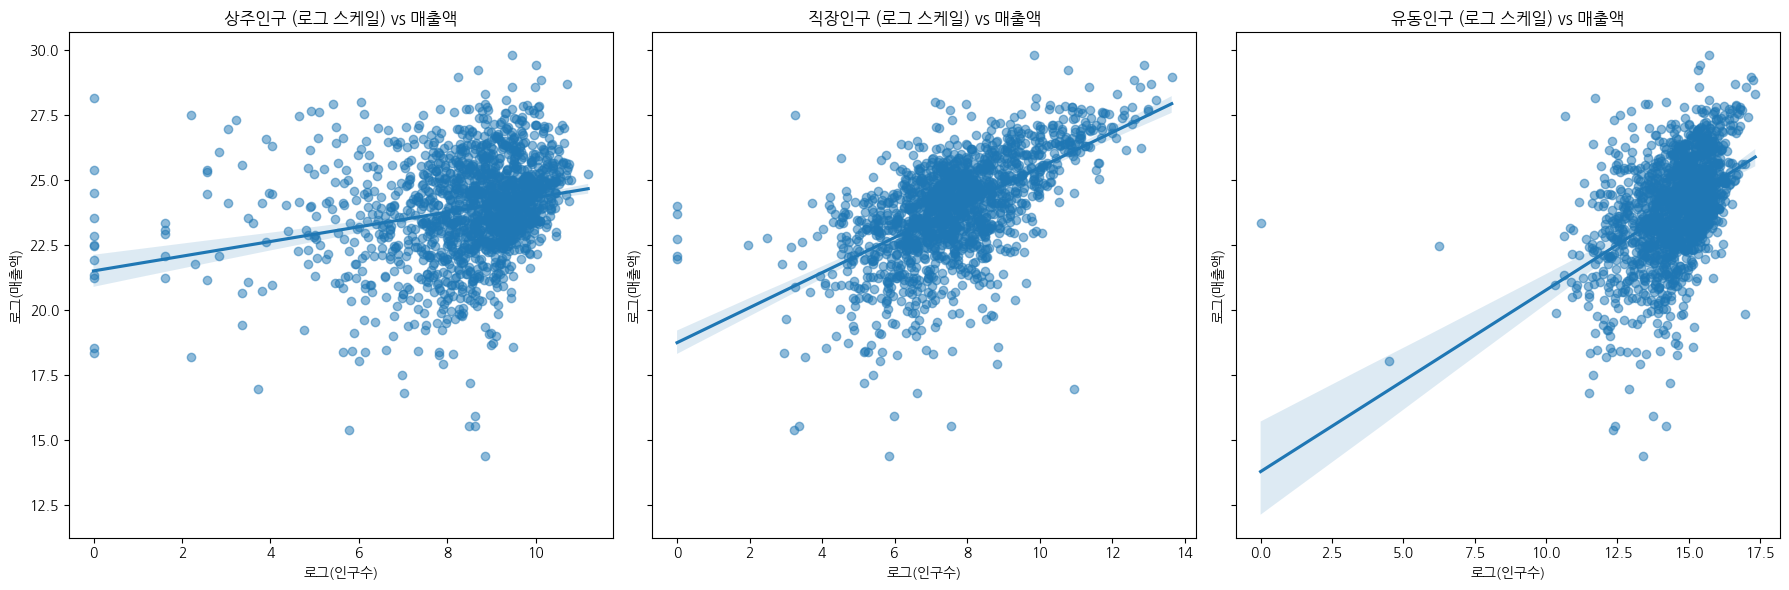

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# 로그 스케일 적용 (0 값 방지 위해 +1)
sns.regplot(data=merged, x=np.log1p(merged['RESIDENT']), y='log_sales', ax=axes[0], scatter_kws={'alpha':0.5})
sns.regplot(data=merged, x=np.log1p(merged['WORKING']), y='log_sales', ax=axes[1], scatter_kws={'alpha':0.5})
sns.regplot(data=merged, x=np.log1p(merged['FLOATING']), y='log_sales', ax=axes[2], scatter_kws={'alpha':0.5})

axes[0].set_title('상주인구 (로그 스케일) vs 매출액')
axes[1].set_title('직장인구 (로그 스케일) vs 매출액')
axes[2].set_title('유동인구 (로그 스케일) vs 매출액')

for ax in axes:
    ax.set_xlabel('로그(인구수)')
    ax.set_ylabel('로그(매출액)')

plt.tight_layout()
plt.show()

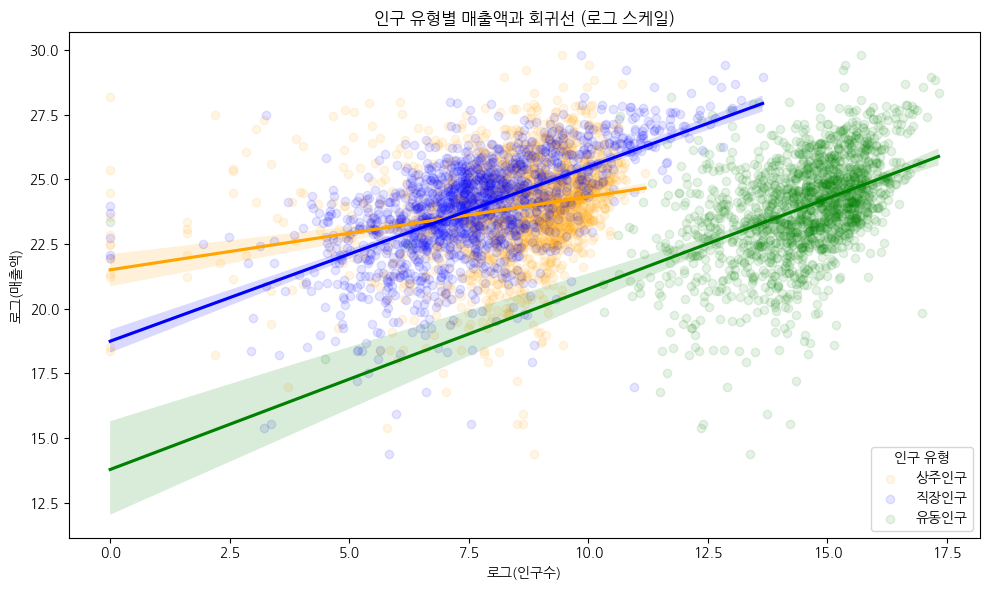

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

plt.figure(figsize=(10, 6))

# 색상 지정
colors = {'RESIDENT':'orange', 'WORKING':'blue', 'FLOATING':'green'}

# 상주인구
sns.regplot(
    x=np.log1p(merged['RESIDENT']),
    y=merged['log_sales'],
    scatter_kws={'alpha':0.1, 'color':colors['RESIDENT']},
    line_kws={'color':colors['RESIDENT']},
    label='상주인구'
)

# 직장인구
sns.regplot(
    x=np.log1p(merged['WORKING']),
    y=merged['log_sales'],
    scatter_kws={'alpha':0.1, 'color':colors['WORKING']},
    line_kws={'color':colors['WORKING']},
    label='직장인구'
)

# 유동인구
sns.regplot(
    x=np.log1p(merged['FLOATING']),
    y=merged['log_sales'],
    scatter_kws={'alpha':0.1, 'color':colors['FLOATING']},
    line_kws={'color':colors['FLOATING']},
    label='유동인구'
)

plt.title('인구 유형별 매출액과 회귀선 (로그 스케일)')
plt.xlabel('로그(인구수)')
plt.ylabel('로그(매출액)')
plt.legend(title='인구 유형')
plt.tight_layout()
plt.show()

### 결론: 인구수와 매출액은 양의 상관관계를 갖는다. 특히 직장인구가 가장 가파르다

## 3.3 인구 특성과 매출 시간/요일 집중도 비교

### 데이터 정리

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()

remote = mysql.connector.connect(
    host = os.getenv("DB_HOST"),
    user = os.getenv("DB_USER"),
    password = os.getenv("DB_PASSWORD"),
    database = "triodb"
)

select_query = """
    SELECT
        s.commercial_area_code,
        st.time,
        SUM(st.sales) AS total_sales,
        SUM(st.customer_count) AS total_customers
    FROM Sales_Time st
    JOIN Shop_Count s ON st.store_id = s.id
    GROUP BY s.commercial_area_code, st.time
"""

sales_time = pd.read_sql(select_query, remote)

select_query = """
    SELECT
        c.name "commercial_area_name",
        f.commercial_area_code "commercial_area_code",
        SUM(t00_06_pop) t00_06_pop,
        SUM(t06_11_pop) t06_11_pop,
        SUM(t11_14_pop) t11_14_pop,
        SUM(t14_17_pop) t14_17_pop,
        SUM(t17_21_pop) t17_21_pop,
        SUM(t21_24_pop) t21_24_pop
    FROM Floating_Population f
    JOIN Commercial_Area c
    ON f.commercial_area_code = c.code
    GROUP BY commercial_area_code;
"""
pop_time = pd.read_sql(select_query, remote)

remote.close()

print(sales_time.head())

print()
print(pop_time.head())

/tmp/ipykernel_19567/3236356351.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_time = pd.read_sql(select_query, remote)


   commercial_area_code   time  total_sales  total_customers
0               3110001  00-06   38628894.0            619.0
1               3110002  00-06   27846233.0            465.0
2               3110003  00-06  196532663.0           1924.0
3               3110004  00-06    2632163.0             14.0
4               3110005  00-06   68939249.0            632.0

     commercial_area_name  commercial_area_code  t00_06_pop  t06_11_pop  \
0                이태원 관광특구               3001491   1895592.0   1460863.0   
1  명동 남대문 북창동 다동 무교동 관광특구               3001492   1525029.0   5965730.0   
2            동대문패션타운 관광특구               3001493   2522709.0   2738662.0   
3              종로·청계 관광특구               3001494   3579057.0   6542641.0   
4                 잠실 관광특구               3001495   2913751.0   2987818.0   

   t11_14_pop  t14_17_pop  t17_21_pop  t21_24_pop  
0   1166166.0   1253333.0   1686675.0   1108133.0  
1   7113146.0   7038391.0   5493145.0   1419882.0  
2   2149149.0   2165234.0 

/tmp/ipykernel_19567/3236356351.py:40: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pop_time = pd.read_sql(select_query, remote)


In [80]:
import re

pop_time_melted = pop_time.melt(
    id_vars=['commercial_area_name', 'commercial_area_code'],
    value_vars=['t00_06_pop','t06_11_pop','t11_14_pop','t14_17_pop','t17_21_pop','t21_24_pop'],
    var_name='time',
    value_name='floating_population'
)
cleaned_times = []
pattern = re.compile(r'^t(\d{2})_(\d{2})_pop$')

# pop_time_melted['time']를 리스트로 변환 후 처리
for t in pop_time_melted['time']:
    cleaned_times.append(pattern.sub(r'\1-\2', t))

# 다시 DataFrame에 넣기
pop_time_melted['time'] = cleaned_times

pop_time_melted.head()

,commercial_area_name,commercial_area_code,time,floating_population
0,이태원 관광특구,3001491,00-06,1895592.0
1,명동 남대문 북창동 다동 무교동 관광특구,3001492,00-06,1525029.0
2,동대문패션타운 관광특구,3001493,00-06,2522709.0
3,종로·청계 관광특구,3001494,00-06,3579057.0
4,잠실 관광특구,3001495,00-06,2913751.0


In [81]:
merged = pd.merge(
    pop_time_melted,
    sales_time,  # Sales_Time 상권 단위 집계
    on=['commercial_area_code','time'],
    how='inner'  # 상권/시간대가 일치하는 것만
)

merged.head()

,commercial_area_name,commercial_area_code,time,floating_population,total_sales,total_customers
0,이태원 관광특구,3001491,00-06,1895592.0,5.458610e+10,2507710.0
1,명동 남대문 북창동 다동 무교동 관광특구,3001492,00-06,1525029.0,3.980736e+10,566321.0
2,동대문패션타운 관광특구,3001493,00-06,2522709.0,2.257012e+10,1155247.0
3,종로·청계 관광특구,3001494,00-06,3579057.0,2.070253e+10,630591.0
4,잠실 관광특구,3001495,00-06,2913751.0,4.133050e+10,1208067.0


In [82]:
merged["total_sales"] = merged  ["total_sales"].astype(int)

In [83]:
merged.head()

,commercial_area_name,commercial_area_code,time,floating_population,total_sales,total_customers
0,이태원 관광특구,3001491,00-06,1895592.0,54586098370,2507710.0
1,명동 남대문 북창동 다동 무교동 관광특구,3001492,00-06,1525029.0,39807364910,566321.0
2,동대문패션타운 관광특구,3001493,00-06,2522709.0,22570120393,1155247.0
3,종로·청계 관광특구,3001494,00-06,3579057.0,20702533011,630591.0
4,잠실 관광특구,3001495,00-06,2913751.0,41330500024,1208067.0


In [84]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9480 entries, 0 to 9479
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   commercial_area_name  9480 non-null   object 
 1   commercial_area_code  9480 non-null   int64  
 2   time                  9480 non-null   object 
 3   floating_population   9480 non-null   float64
 4   total_sales           9480 non-null   int64  
 5   total_customers       9480 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 444.5+ KB


In [85]:
merged.to_csv("../data/3_3_시간별_매출.csv")

In [ ]:
import mysql.connector
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os

load_dotenv()

remote = mysql.connector.connect(
    host = os.getenv("DB_HOST"),
    user = os.getenv("DB_USER"),
    password = os.getenv("DB_PASSWORD"),
    database = "triodb"
)

select_query = """
    SELECT
        s.commercial_area_code,
        sd.week,
        SUM(sd.sales) AS total_sales,
        SUM(sd.customer_count) AS total_customers
    FROM Sales_Day sd
    JOIN Shop_Count s ON sd.store_id = s.id
    GROUP BY s.commercial_area_code, sd.week
"""

sales_day = pd.read_sql(select_query, remote)

select_query = """
    SELECT
        c.name "commercial_area_name",
        f.commercial_area_code "commercial_area_code",
        SUM(mon_pop) MONDAY,
        SUM(tue_pop) TUESDAY,
        SUM(wed_pop) WEDNESDAY,
        SUM(thu_pop) THURSDAY,
        SUM(fri_pop) FRIDAY,
        SUM(sat_pop) SATURDAY,
        SUM(sun_pop) SUNDAY
    FROM Floating_Population f
    JOIN Commercial_Area c
    ON f.commercial_area_code = c.code
    GROUP BY commercial_area_code;
"""
pop_day = pd.read_sql(select_query, remote)

remote.close()

print(sales_day.head())

print()
print(pop_day.head())


/tmp/ipykernel_19567/764972128.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_day = pd.read_sql(select_query, remote)


   commercial_area_code    week   total_sales  total_customers
0               3110001  MONDAY  2.306369e+08           6520.0
1               3110002  MONDAY  4.203081e+09         152533.0
2               3110003  MONDAY  9.855501e+08          17178.0
3               3110004  MONDAY  1.985533e+08           4560.0
4               3110005  MONDAY  5.912225e+08           3253.0

     commercial_area_name  commercial_area_code     MONDAY    TUESDAY  \
0                이태원 관광특구               3001491  1107090.0  1095019.0   
1  명동 남대문 북창동 다동 무교동 관광특구               3001492  4452014.0  4688168.0   
2            동대문패션타운 관광특구               3001493  2109758.0  2161497.0   
3              종로·청계 관광특구               3001494  5118959.0  5293404.0   
4                 잠실 관광특구               3001495  2268059.0  2304198.0   

   WEDNESDAY   THURSDAY     FRIDAY   SATURDAY     SUNDAY  
0  1145792.0  1144569.0  1259463.0  1473414.0  1345410.0  
1  4650240.0  4689190.0  4680198.0  3006040.0  2389477.0  
2  21

/tmp/ipykernel_19567/764972128.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pop_day = pd.read_sql(select_query, remote)


In [90]:
pop_day_melted = pop_day.melt(
    id_vars=['commercial_area_name', 'commercial_area_code'],
    value_vars=['MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY', 'SUNDAY'],
    var_name='week',
    value_name='floating_population'
)

pop_day_melted.head()

,commercial_area_name,commercial_area_code,week,floating_population
0,이태원 관광특구,3001491,MONDAY,1107090.0
1,명동 남대문 북창동 다동 무교동 관광특구,3001492,MONDAY,4452014.0
2,동대문패션타운 관광특구,3001493,MONDAY,2109758.0
3,종로·청계 관광특구,3001494,MONDAY,5118959.0
4,잠실 관광특구,3001495,MONDAY,2268059.0


In [92]:
merged = pd.merge(
    pop_day_melted,
    sales_day,
    on=['commercial_area_code','week'],
    how='inner'
)

merged.head()

,commercial_area_name,commercial_area_code,week,floating_population,total_sales,total_customers
0,이태원 관광특구,3001491,MONDAY,1107090.0,3.550932e+10,1340223.0
1,명동 남대문 북창동 다동 무교동 관광특구,3001492,MONDAY,4452014.0,2.763080e+11,9831998.0
2,동대문패션타운 관광특구,3001493,MONDAY,2109758.0,6.630981e+10,2017118.0
3,종로·청계 관광특구,3001494,MONDAY,5118959.0,1.554046e+11,3914396.0
4,잠실 관광특구,3001495,MONDAY,2268059.0,1.702945e+11,6174815.0


In [95]:
merged['total_sales'] = merged['total_sales'].astype(int)

In [104]:
merged.head()

,commercial_area_name,commercial_area_code,week,floating_population,total_sales,total_customers
0,이태원 관광특구,3001491,MONDAY,1107090.0,35509321731,1340223.0
1,명동 남대문 북창동 다동 무교동 관광특구,3001492,MONDAY,4452014.0,276307999078,9831998.0
2,동대문패션타운 관광특구,3001493,MONDAY,2109758.0,66309807274,2017118.0
3,종로·청계 관광특구,3001494,MONDAY,5118959.0,155404637432,3914396.0
4,잠실 관광특구,3001495,MONDAY,2268059.0,170294512346,6174815.0


In [105]:
merged.to_csv("../data/3_3_요일별_매출.csv")

### 시각화

In [45]:
import pandas as pd

sales_time = pd.read_csv("../data/3_3_시간별_매출.csv")
sales_time.head()

,Unnamed: 0,commercial_area_name,commercial_area_code,time,floating_population,total_sales,total_customers
0,0,이태원 관광특구,3001491,00-06,1895592.0,54586098370,2507710.0
1,1,명동 남대문 북창동 다동 무교동 관광특구,3001492,00-06,1525029.0,39807364910,566321.0
2,2,동대문패션타운 관광특구,3001493,00-06,2522709.0,22570120393,1155247.0
3,3,종로·청계 관광특구,3001494,00-06,3579057.0,20702533011,630591.0
4,4,잠실 관광특구,3001495,00-06,2913751.0,41330500024,1208067.0


/var/folders/x1/3x1wk6hx6g3_dv91vx02k_dm0000gn/T/ipykernel_97108/340554036.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


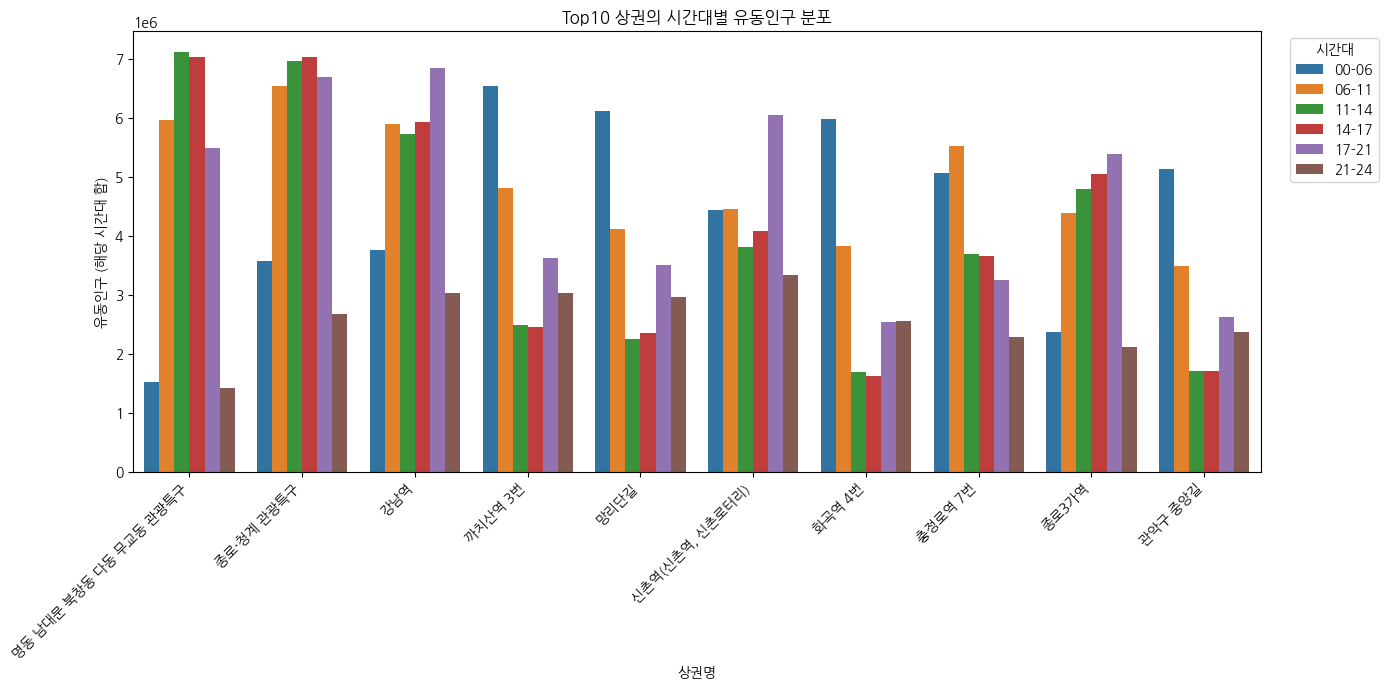

In [46]:
top10_areas = sales_time.nlargest(20, 'floating_population')

# top10 상권 리스트 (위에서 만든 top10_areas 사용)
top_names = top10_areas['commercial_area_name'].tolist()

# 원본에서 top10 상권에 해당하는 모든 행 선택
df_top10_full = sales_time[sales_time['commercial_area_name'].isin(top_names)]

plt.figure(figsize=(14,7))
sns.barplot(
    data=df_top10_full,
    x='commercial_area_name',
    y='floating_population',
    hue='time',
    estimator=sum,     # 같은 상권+time 여러 행 있을 때 합계로 표시
    ci=None,
    order=top10_areas.sort_values('floating_population', ascending=False)['commercial_area_name']
)
plt.title('Top10 상권의 시간대별 유동인구 분포')
plt.xlabel('상권명')
plt.ylabel('유동인구 (해당 시간대 합)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='시간대', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()




In [41]:
import pandas as pd

sales_day = pd.read_csv("../data/3_3_요일별_매출.csv")
sales_day.head()

,Unnamed: 0,commercial_area_name,commercial_area_code,week,floating_population,total_sales,total_customers
0,0,이태원 관광특구,3001491,MONDAY,1107090.0,35509321731,1340223.0
1,1,명동 남대문 북창동 다동 무교동 관광특구,3001492,MONDAY,4452014.0,276307999078,9831998.0
2,2,동대문패션타운 관광특구,3001493,MONDAY,2109758.0,66309807274,2017118.0
3,3,종로·청계 관광특구,3001494,MONDAY,5118959.0,155404637432,3914396.0
4,4,잠실 관광특구,3001495,MONDAY,2268059.0,170294512346,6174815.0


/var/folders/x1/3x1wk6hx6g3_dv91vx02k_dm0000gn/T/ipykernel_97108/2821786780.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


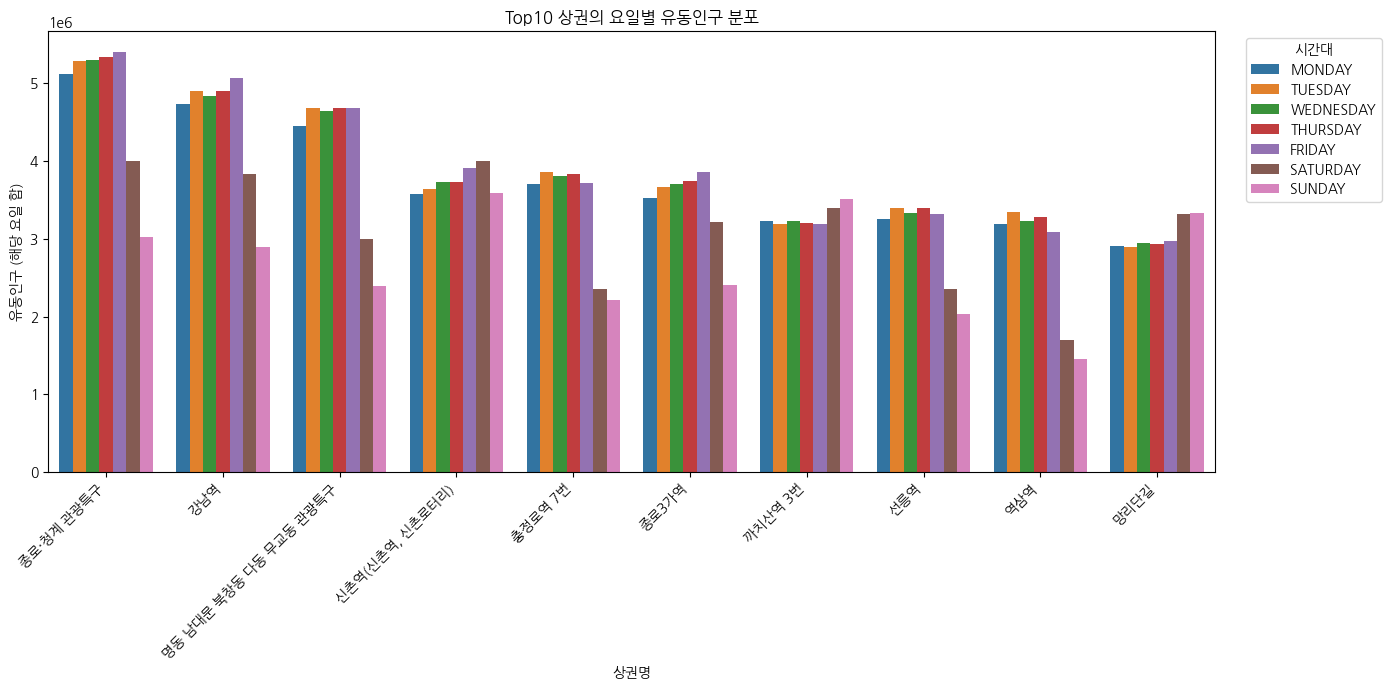

In [43]:
top20_areas = sales_day.nlargest(53, 'floating_population')

# top20 상권 리스트 (위에서 만든 top20_areas 사용)
top_names = top20_areas['commercial_area_name'].tolist()

# 원본에서 top20 상권에 해당하는 모든 행 선택
df_top20_full = sales_day[sales_day['commercial_area_name'].isin(top_names)]

plt.figure(figsize=(14,7))
sns.barplot(
    data=df_top20_full,
    x='commercial_area_name',
    y='floating_population',
    hue='week',
    estimator=sum,     # 같은 상권+time 여러 행 있을 때 합계로 표시
    ci=None,
    order=top20_areas.sort_values('floating_population', ascending=False)['commercial_area_name']
)
plt.title('Top10 상권의 요일별 유동인구 분포')
plt.xlabel('상권명')
plt.ylabel('유동인구 (해당 요일 합)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='시간대', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

